In [35]:
#libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

#scikit
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn import metrics
# from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("cleaned_data_v5.csv", encoding="Latin-1")

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
#renaming 'age'
#[70-80) -> 70
#[60-70) -> 60
#[50-60) -> 90
#[80-90) -> 80
#[40-50) -> 40
#[30-40) -> 30
#[90-100) -> 90
#[20-30) -> 20
#[10-20) -> 10
#[0-10)-> 0
age_mapping = {'[70-80)': 70, '[60-70)': 60, '[50-60)':90, '[80-90)':80, '[40-50)': 40, '[30-40)': 30,'[90-100)': 90, '[20-30)': 20, '[10-20)': 10, '[0-10)': 0}
df.age = df.age.replace(age_mapping)

In [5]:
list_of_meds = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# renaming values in medicines
# change in dosage('dosage_increased', 'dosage_decreased') -> 1
# no change or not prescribed 'not_prescribed', no_change_dosage -> 0
new_values_meds = {"dosage_increased":3, "dosage_decreased":1 ,"no_change_dosage":2, "not_prescribed":0}
for medicine in list_of_meds:
    df[medicine] = df[medicine].replace(new_values_meds)

In [6]:
# renaming 'readmitted'
# readmitted ('>30', '<30') -> 1
# not readmitted  ('NO') -> 0
df.readmitted = df.readmitted.replace({'NO': 0, '>30': 1, '<30':1})

In [7]:
# renaming 'diabetes_med_prescribed'
# 'Yes' -> 1 
# 'No' -> 0
df = df.rename(columns={'diabates_med_prescribed': 'diabetes_med_prescribed'})
df.diabetes_med_prescribed = df.diabetes_med_prescribed.replace({'Yes': 1, 'No':0})

In [8]:
# renaming 'change_in_meds'
# 'Ch' -> 1
# 'No' -> 0
df.change_in_meds = df.change_in_meds.replace({'Ch': 1, 'No': 0})

Using Label Encoder for gender and race

In [9]:
x = df.columns.values
le_gender = preprocessing.LabelEncoder()
le_race = preprocessing.LabelEncoder()
x_gender = le_gender.fit_transform(df.gender.values)
x_race = le_race.fit_transform(df.race.values)
df['gender'] = x_gender
df['race'] = x_race

In [10]:
#discretising number_diagnoses
df['number_diagnoses'] = np.where(df['number_diagnoses'].between(0,4), 0, df['number_diagnoses'])
df['number_diagnoses'] = np.where(df['number_diagnoses'].between(5,8), 1, df['number_diagnoses'])
df['number_diagnoses'] = np.where(df['number_diagnoses'].between(9,12), 2, df['number_diagnoses'])
df['number_diagnoses'] = np.where(df['number_diagnoses'] > 12, 3, df['number_diagnoses'])

#Source for all masking:
# https://stackoverflow.com/questions/46168450/replace-a-specific-range-of-values-in-a-pandas-dataframe

In [11]:
#discretising num_lab_procedures
df['num_lab_procedures'] = np.where(df['num_lab_procedures'].between(0,20), 0, df['num_lab_procedures'])
df['num_lab_procedures'] = np.where(df['num_lab_procedures'].between(21,40), 1, df['num_lab_procedures'])
df['num_lab_procedures'] = np.where(df['num_lab_procedures'].between(41,60), 2, df['num_lab_procedures'])
df['num_lab_procedures'] = np.where(df['num_lab_procedures'].between(61,80), 3, df['num_lab_procedures'])
df['num_lab_procedures'] = np.where(df['num_lab_procedures'] > 80, 4, df['num_lab_procedures'])

In [12]:
# discretising days_in_hospital
df['days_in_hospital'] = np.where(df['days_in_hospital'].between(0,10), 0, df['days_in_hospital'])
df['days_in_hospital'] = np.where(df['days_in_hospital'] > 10, 1, df['days_in_hospital'])

In [13]:
# discretising num_current_medications
df['num_current_medications'] = np.where(df['num_current_medications'].between(0,20), 0, df['num_current_medications'])
df['num_current_medications'] = np.where(df['num_current_medications'].between(21,40), 1, df['num_current_medications'])
df['num_current_medications'] = np.where(df['num_current_medications'].between(41,60), 2, df['num_current_medications'])
df['num_current_medications'] = np.where(df['num_current_medications'] > 60, 3, df['days_in_hospital'])

In [14]:
# discretising num_inpatient_overnight_stays
df['num_inpatient_overnight_stays'] = np.where(df['num_inpatient_overnight_stays'].between(0,10), 0, df['num_inpatient_overnight_stays'])
df['num_inpatient_overnight_stays'] = np.where(df['num_inpatient_overnight_stays'].between(11,20), 1, df['num_inpatient_overnight_stays'])
df['num_inpatient_overnight_stays'] = np.where(df['num_inpatient_overnight_stays'] > 20, 2, df['num_inpatient_overnight_stays'])

In [15]:
# discretising num_previous_emergencies
df['num_previous_emergencies'] = np.where(df['num_previous_emergencies'].between(0,20), 0, df['num_previous_emergencies'])
df['num_previous_emergencies'] = np.where(df['num_previous_emergencies'].between(21,40), 1, df['num_previous_emergencies'])
df['num_previous_emergencies'] = np.where(df['num_previous_emergencies'].between(41,60), 2, df['num_previous_emergencies'])
df['num_previous_emergencies'] = np.where(df['num_previous_emergencies'] > 60, 3, df['num_previous_emergencies'])

In [16]:
# discretising num_outpatient_appointments
df['num_outpatient_appointments'] = np.where(df['num_outpatient_appointments'].between(0,20), 0, df['num_outpatient_appointments'])
df['num_outpatient_appointments'] = np.where(df['num_outpatient_appointments'].between(21,40), 1, df['num_outpatient_appointments'])
df['num_outpatient_appointments'] = np.where(df['num_outpatient_appointments'] > 40, 2, df['num_outpatient_appointments'])

In [17]:
df = pd.get_dummies(df)

In [18]:
df.columns

Index(['race', 'gender', 'age', 'days_in_hospital', 'num_lab_procedures',
       'num_not_lab_procedures', 'num_current_medications',
       'num_outpatient_appointments', 'num_previous_emergencies',
       'num_inpatient_overnight_stays', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change_in_meds', 'diabetes_med_prescribed',
       'readmitted'],
      dtype='object')

Modelling

In [19]:
#separating samples from labels
samples = df.drop('readmitted',axis=1)
labels = df['readmitted']
print(samples.shape)

(99492, 36)


In [20]:
# dividing df in test data and training data
x_train, x_test, y_train, y_test = train_test_split(samples, labels, test_size=0.7, train_size= 0.3, stratify=labels, random_state=42)
print(x_train.shape)
print(x_test.shape)
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

(29847, 36)
(69645, 36)


KNN

In [21]:
#Normalisation is necessart becuase the data needs to be scaled to a fixed range.
#normalisation
scaler = preprocessing.MinMaxScaler()
#training scaler
x_train_norm = scaler.fit_transform(x_train)
#using scaler
x_test_norm = scaler.transform(x_test)

#checking standard deviation mean, min, max values
print("Standard deviation: " + str(x_test_norm.std(axis=0)))
print("Mean: " + str(x_test_norm.mean(axis=0)))
print("Max: " + str(x_test_norm.max(axis=0)))
print("Min: " + str(x_test_norm.min(axis=0)))

#Source
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
# https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
# Sebastian Raschka, 2015. Python Machine Learning.
# https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

Standard deviation: [0.21624928 0.49847966 0.2021482  0.22726486 0.24624795 0.28431169
 0.08110827 0.01856085 0.00703199 0.03786652 0.21784889 0.27154709
 0.08319446 0.05562796 0.01980299 0.14983488 0.         0.22447902
 0.21088106 0.01467418 0.17481388 0.16434852 0.03657671 0.01977689
 0.00535875 0.01129578 0.         0.         0.36614508 0.05458346
 0.01071705 0.         0.         0.00757848 0.49874214 0.42105018]
Mean: [4.14006749e-01 4.61038122e-01 7.53023668e-01 5.46342164e-02
 4.12380645e-01 2.23878240e-01 1.90106971e-02 3.15887716e-04
 9.09373729e-05 1.40713619e-03 4.66623591e-01 1.32821212e-01
 1.00796899e-02 4.61866131e-03 5.55196592e-04 3.41015148e-02
 0.00000000e+00 8.29588149e-02 7.12326800e-02 2.15377988e-04
 4.83930409e-02 4.24916840e-02 1.96711896e-03 3.80501113e-04
 2.87170651e-05 1.91447101e-04 0.00000000e+00 0.00000000e+00
 3.52947089e-01 4.47028980e-03 1.14868260e-04 0.00000000e+00
 0.00000000e+00 2.87170651e-05 4.64555962e-01 7.69660421e-01]
Max: [1.         1.  

In [22]:
#KNN modelling
knn = neighbors.KNeighborsClassifier()

#Choosing Hyper Parameters

#Hyper Parameters Set
parameters = {
        'n_neighbors':[1, 5, 15, 25, 35, 45, 55, 65],
        'weights':['uniform', 'distance'],
        'metric':['euclidean', 'manhattan'],
        'algorithm':['ball_tree','kd_tree','brute']
             }

#Making models with hyper parameters sets
grid = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=3, verbose=1)


#Sources used: 
# https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn
# https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
# https://scikit-learn.org/stable/modules/grid_search.html

In [23]:
#Learning
grid.fit(x_train_norm, y_train)

#Selection of best hyperparameters
print("Selected parameters")
print(grid.best_params_)

print("Best Estimator: ")
print(grid.best_estimator_)

print("Best Score:")
print(grid.best_score_)

#Sources used:
# https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn
# https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 53.9min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 80.2min finished


Selected parameters
{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 55, 'weights': 'uniform'}
Best Estimator: 
KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=55, p=2,
                     weights='uniform')
Best Score:
0.5524508325794888


In [30]:
#Prediction
y_prediction_knn = grid.predict(x_test_norm)

In [33]:
#Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_prediction_knn)

#accuracy score
print("Accuracy score:")
grid_accuracy = metrics.accuracy_score(y_test, y_prediction_knn)
print(grid_accuracy)

#classification report
print("Classification report:")
metrics.classification_report(y_test, y_prediction_knn)
# Source used: https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn

Accuracy score:
0.551812764735444
Classification report:


'              precision    recall  f1-score   support\n\n           0       0.57      0.64      0.61     37322\n           1       0.52      0.45      0.48     32323\n\n    accuracy                           0.55     69645\n   macro avg       0.55      0.54      0.54     69645\nweighted avg       0.55      0.55      0.55     69645\n'

Text(24.0, 0.5, 'True')

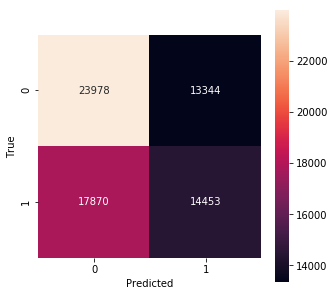

In [37]:
#confusion matrix for heatmap
fig_size = plt.subplots(figsize=(5,5)) 
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# Source:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [28]:
#K fold cross-validation

cross_val = cross_val_score(neighbors.KNeighborsClassifier(65), samples, labels, cv=10)
print("Cross validation mean:" + str(cross_val.mean()))
#Source:
# Jake Vanderplas, PyCon2015 - Validation and Model Selection (notebook from week 7)

Cross validation mean:0.5464659724393403


Sources used:
- Sebastian Raschka, 2015. Python Machine Learning.
- Dmitry Zinoviev, 2016. Data Science Essentials in Python.
- Jake Vanderplas, PyCon2015 - Validation and Model Selection (notebook from week 7)
- https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn
- https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
- https://scikit-learn.org/stable/modules/generated
- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer
- https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
- https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb
- https://stackoverflow.com/questions/46168450/replace-a-specific-range-of-values-in-a-pandas-dataframe
- https://www.kaggle.com/iabhishekofficial/prediction-on-hospital-readmission
- https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
- https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
- https://scikit-learn.org/stable/modules/grid_search.html
- https://python-graph-gallery.com/1-basic-barplot/
- https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6
- https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html